In [1]:
# Load libraries
import pandas  as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
import pickle

In [2]:
# Load dataset
# url = r"/Users/TMorr/Desktop/Python/Machine Learning Intro/uci_heart_disease.csv"
names = ['age', 'sex','cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# dataset = read_csv(url, names=names)
dataset = pd.read_csv('uci_heart_disease.csv', names=names)

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# shape
print("Rows, Columns")
print(dataset.shape)

Rows, Columns
(303, 14)


In [5]:
# descriptions
print(dataset.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [6]:
# class distribution
print(dataset.groupby('target').size())

target
0    138
1    165
dtype: int64


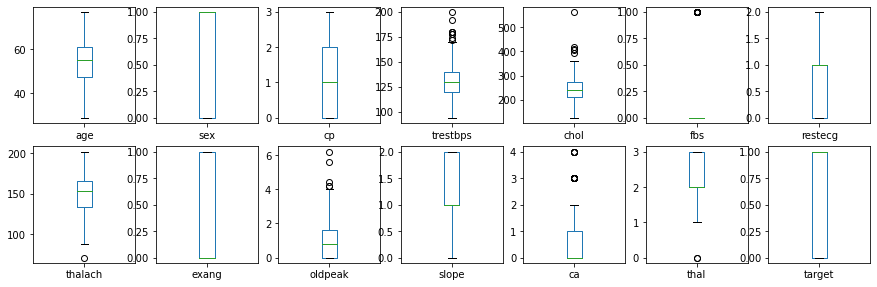

In [7]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(6,7), sharex=False, sharey=False, figsize = [15, 15])
pyplot.show()

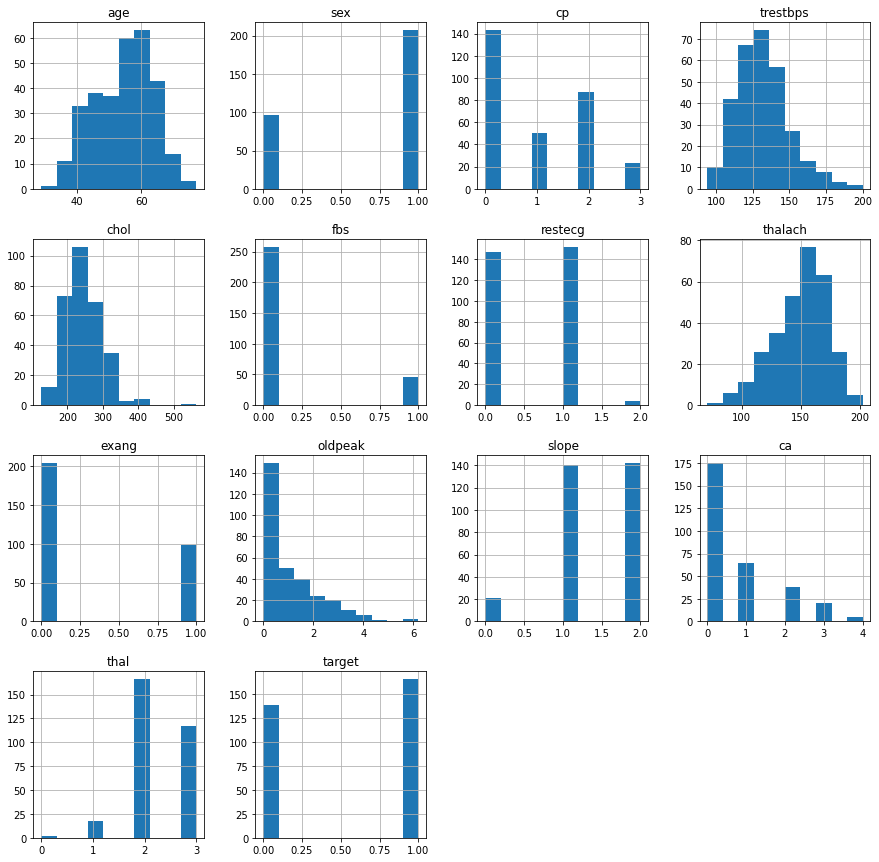

In [8]:
# histograms
dataset.hist(figsize = [15, 15])
pyplot.show()

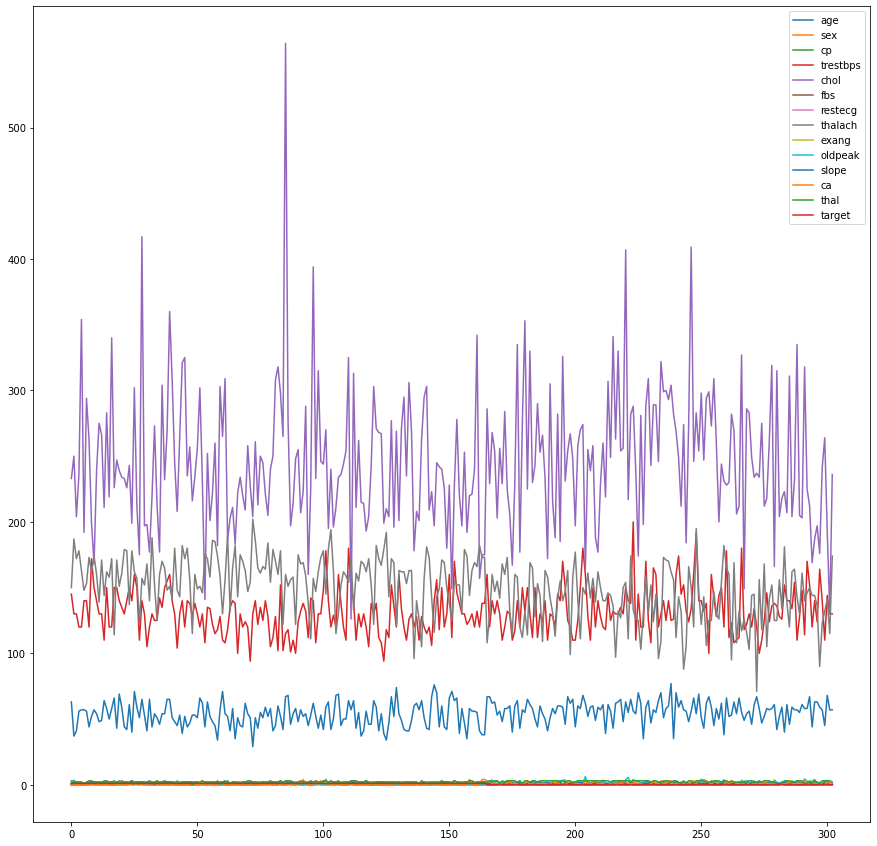

In [9]:
dataset.plot.line(figsize = [15, 15])
pyplot.show()

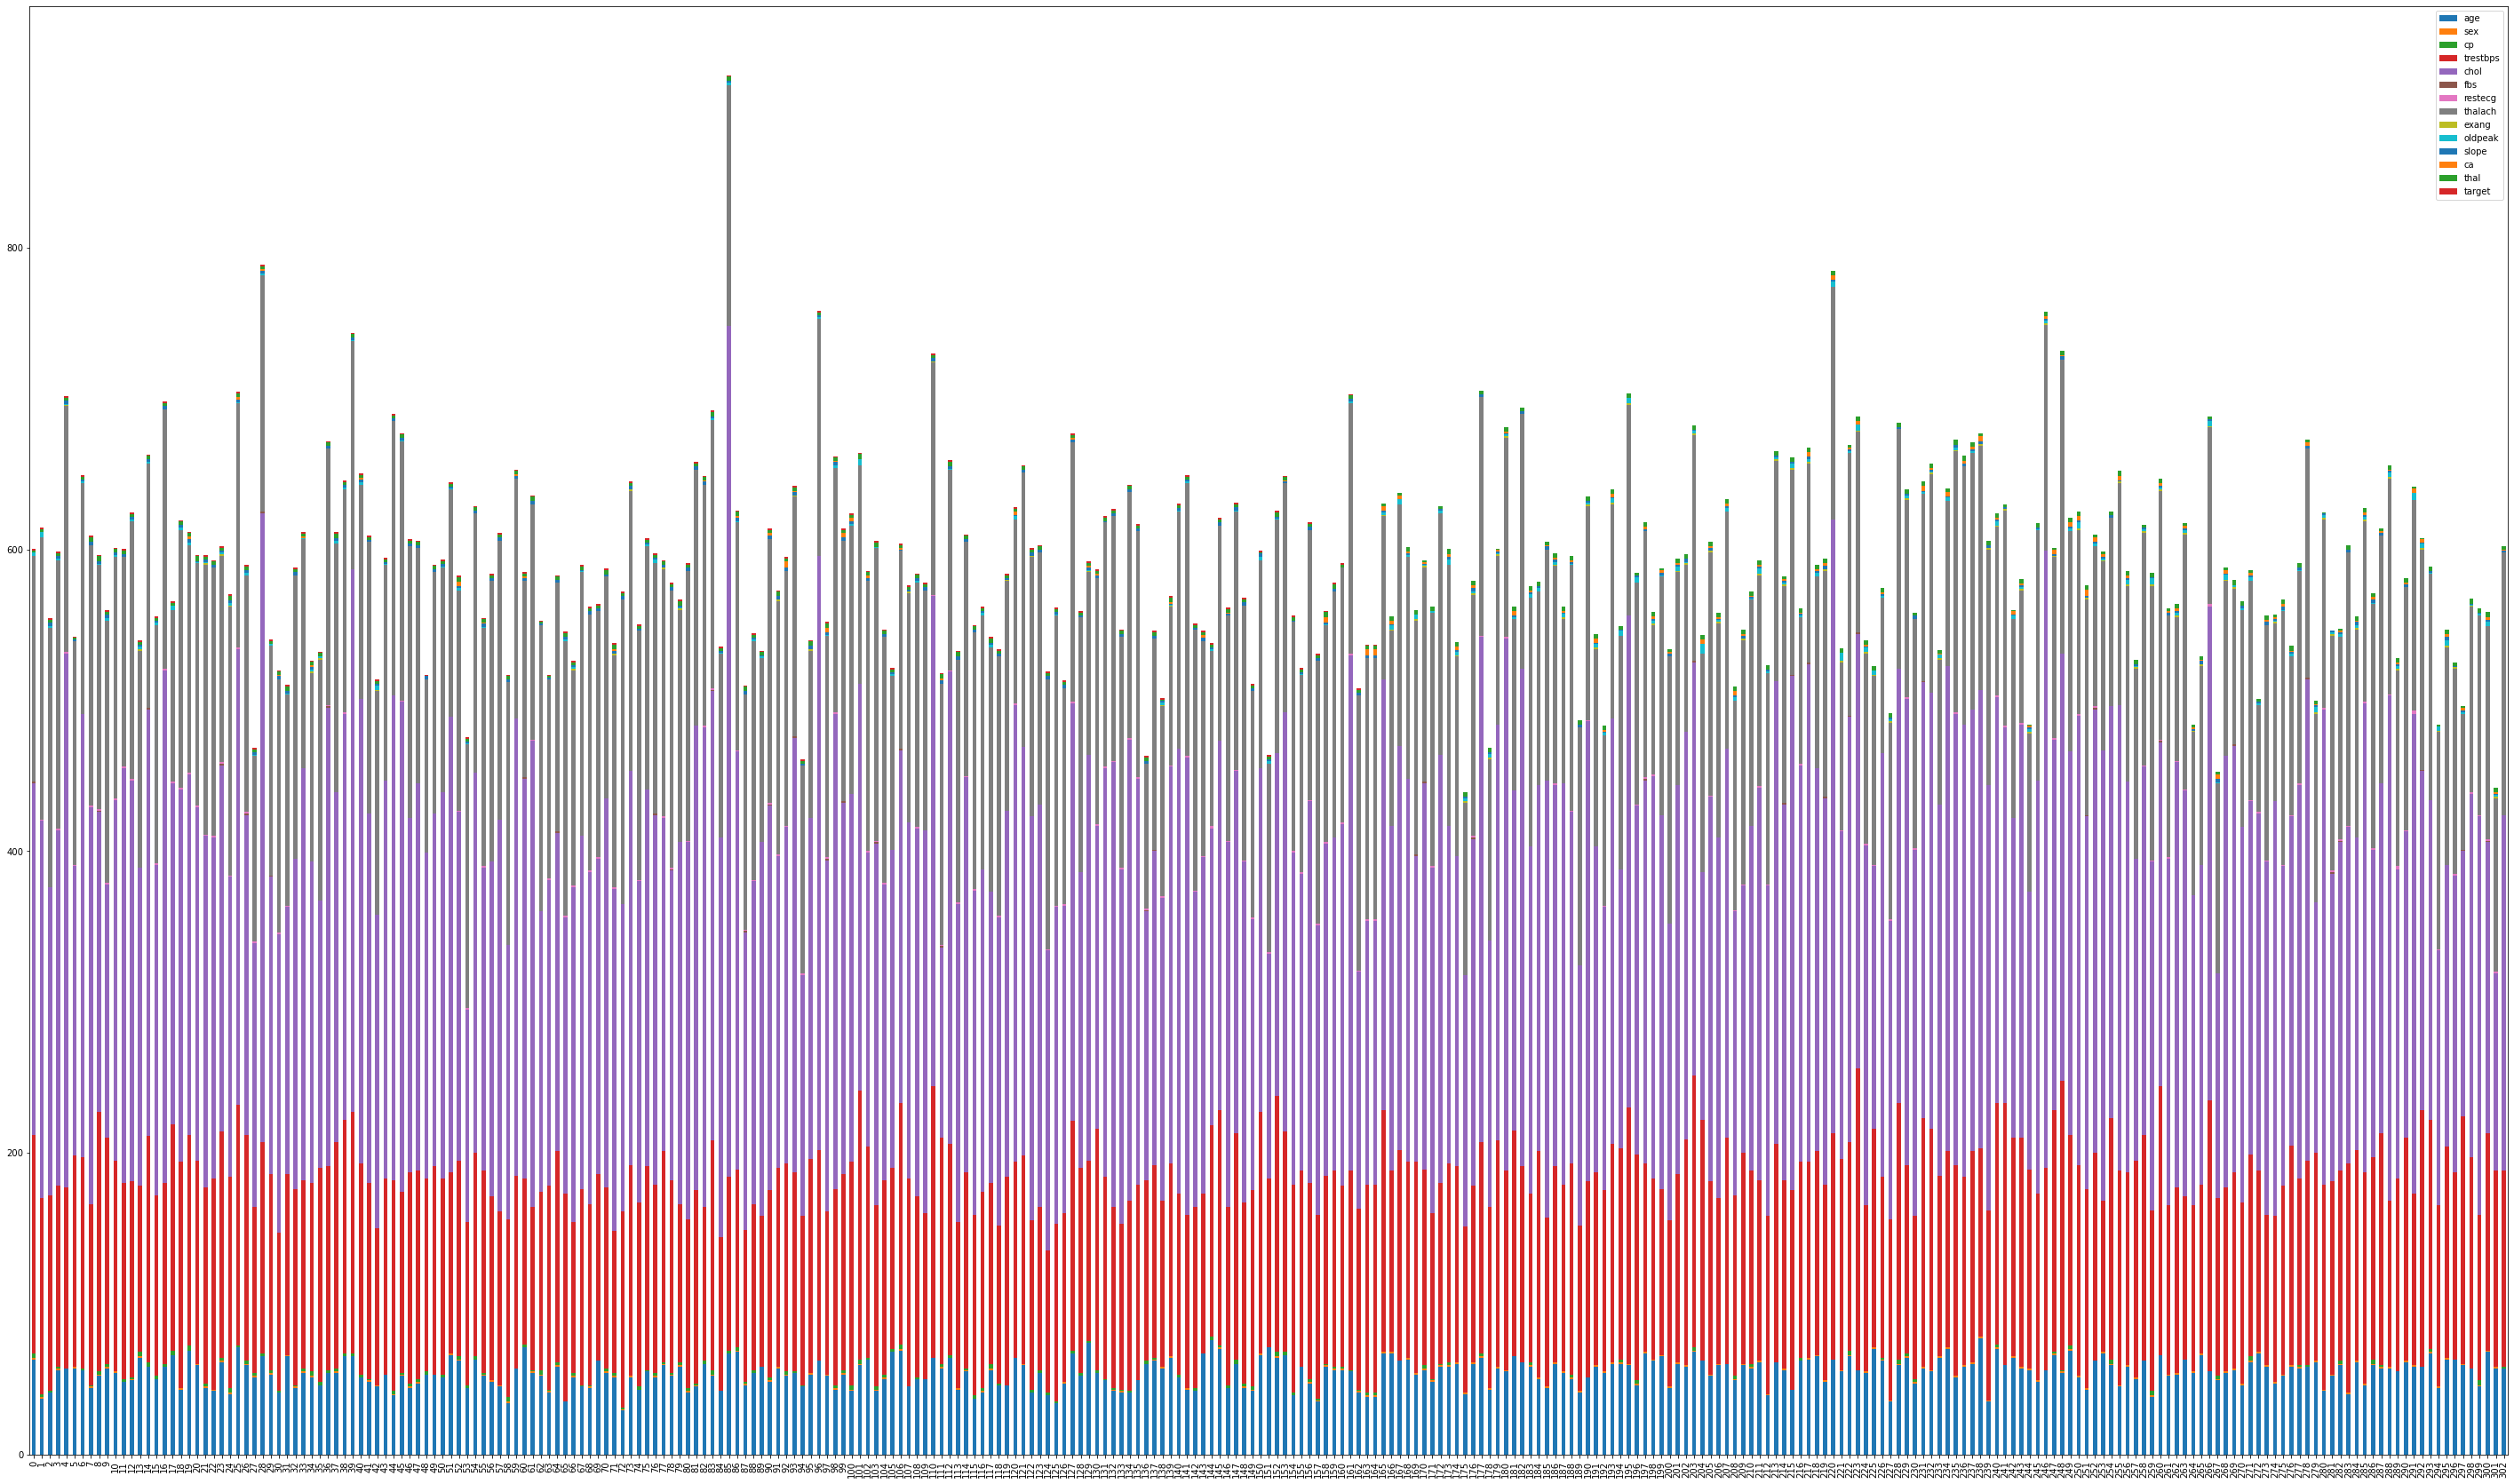

In [10]:
dataset.plot.bar(stacked=True, figsize = [50, 30])
pyplot.show()

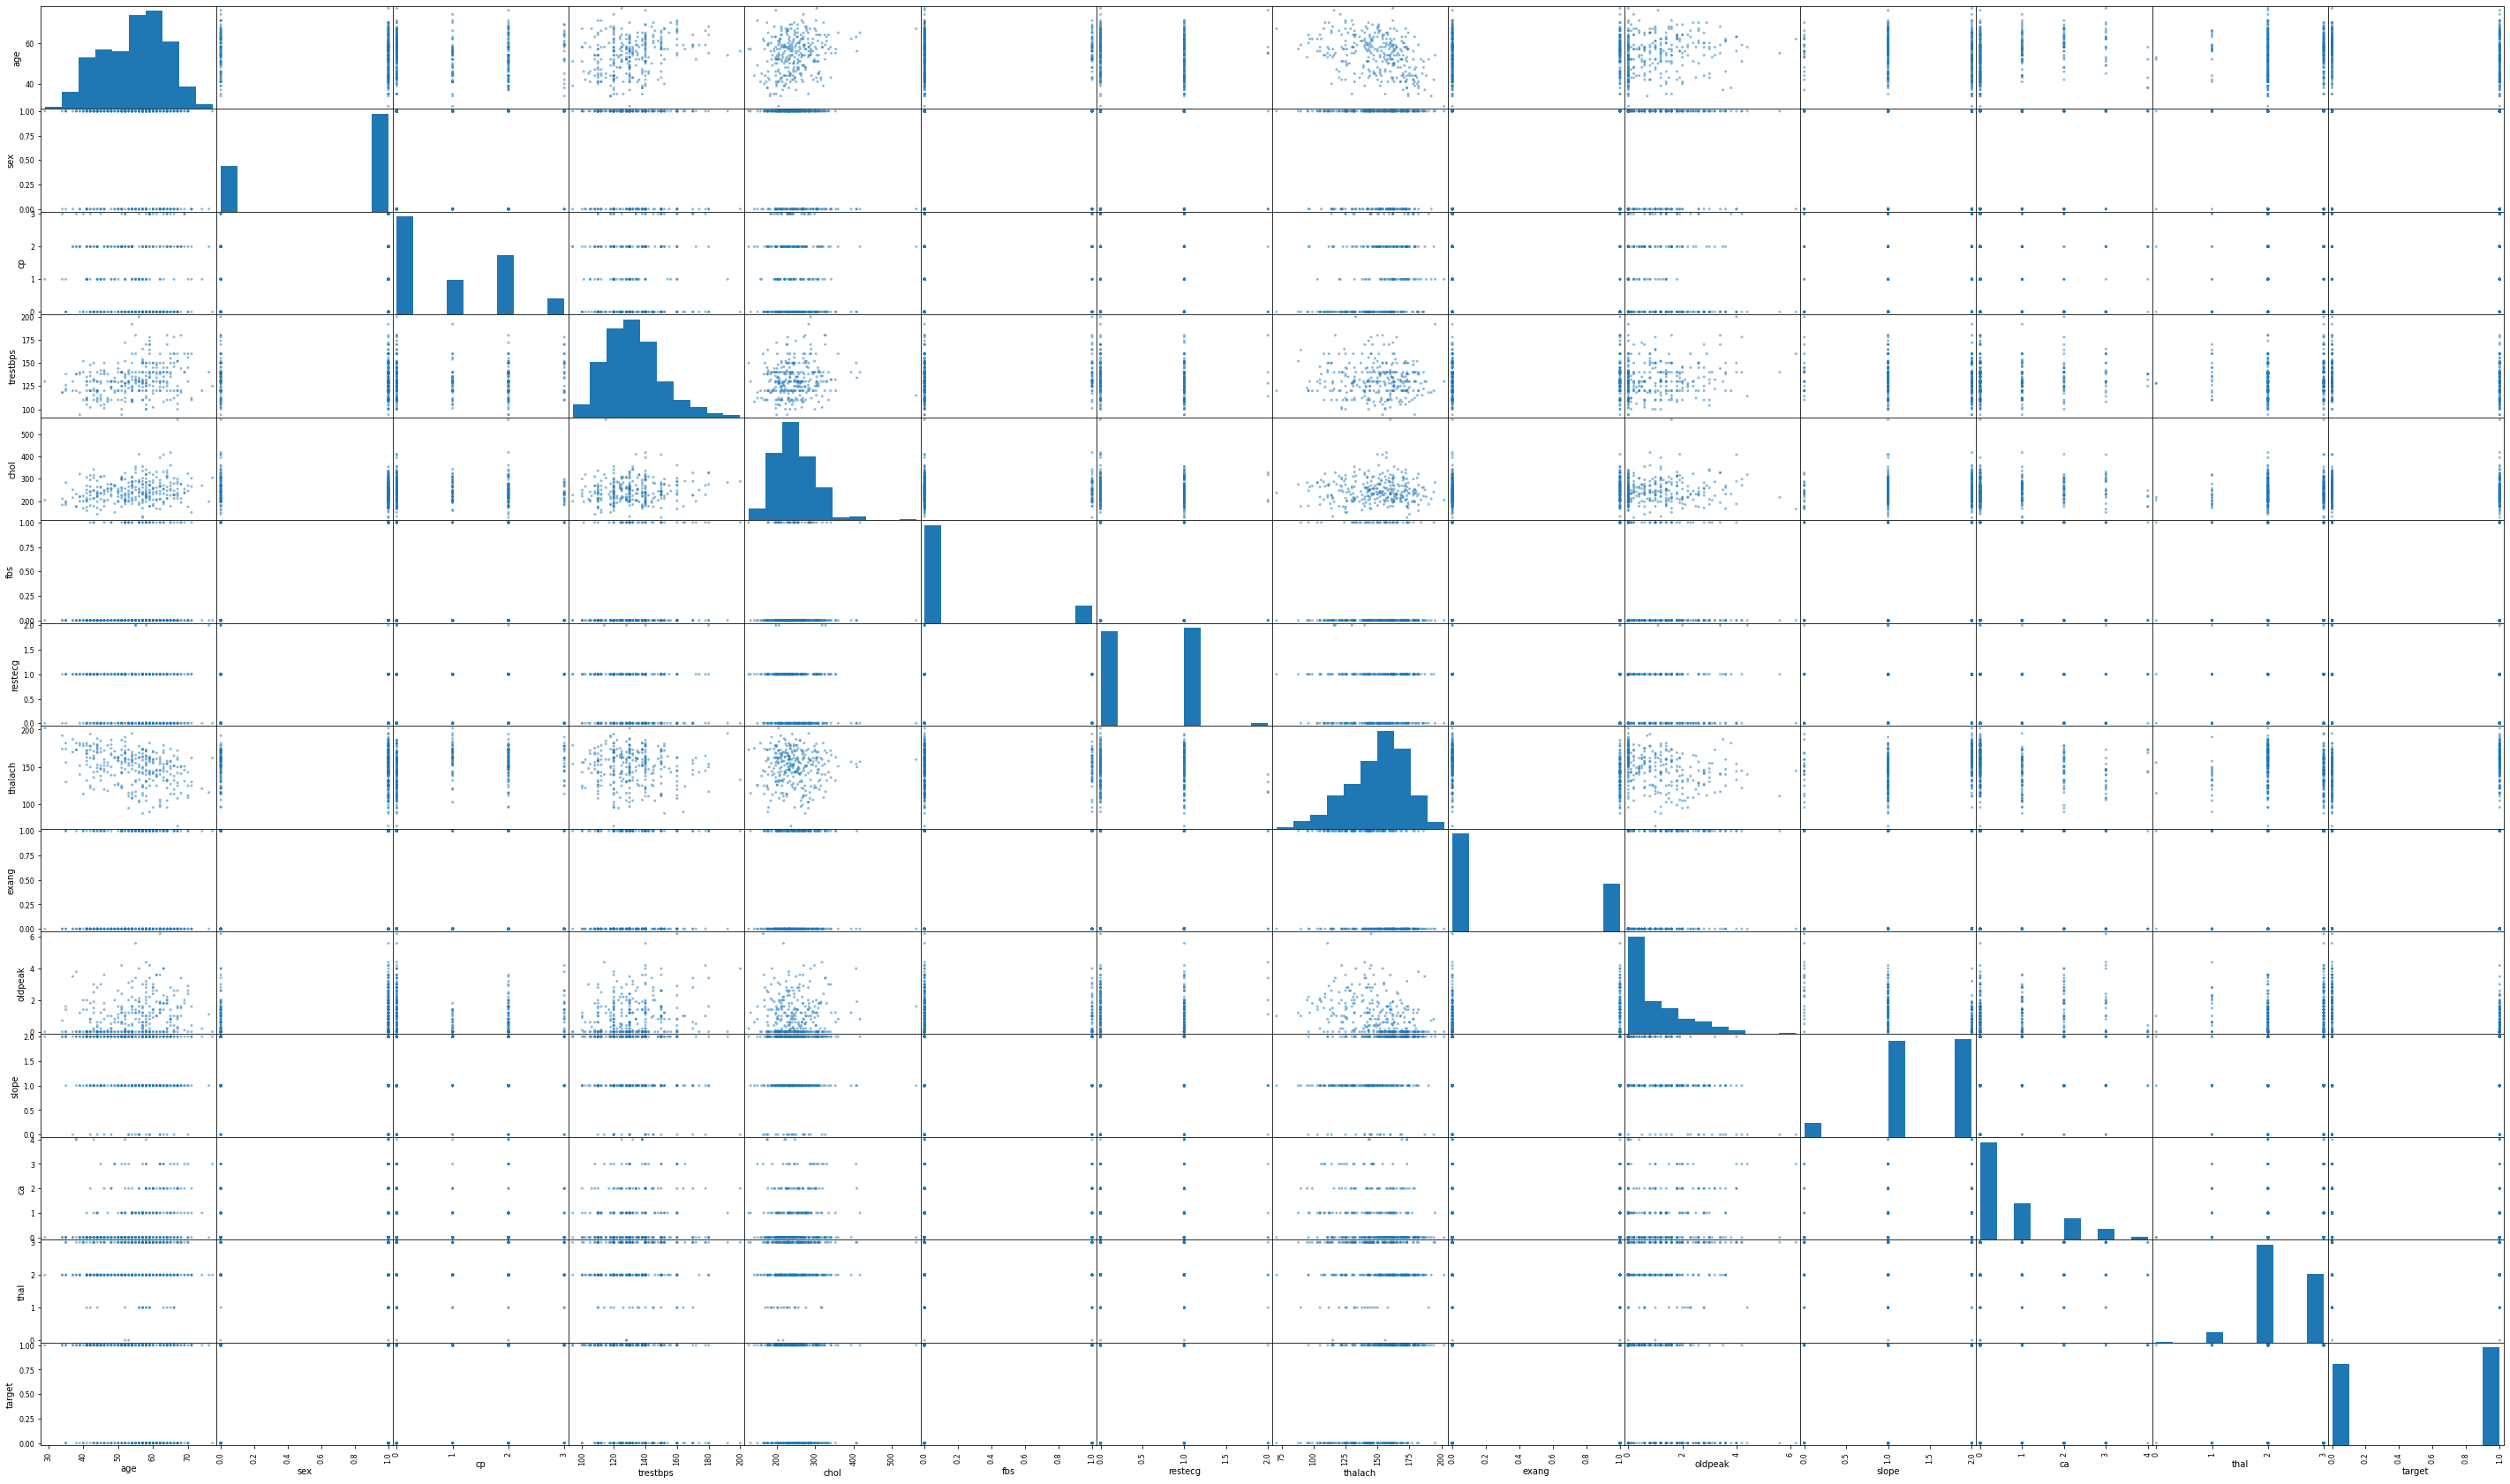

In [11]:
# scatter plot matrix
scatter_matrix(dataset, figsize = [50, 30])
pyplot.show()

In [12]:
# Split-out validation dataset
X = dataset.drop(columns=['target'])
y = dataset[['target']]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

LR: 0.814000 (0.056692)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

RFC: 0.805167 (0.086183)
CART: 0.697500 (0.123496)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


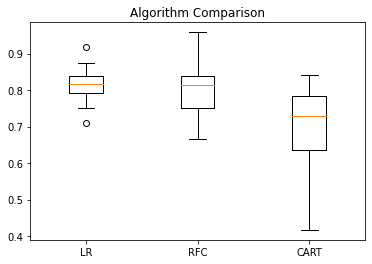

In [14]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [15]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators = 16, max_depth = 6, criterion = 'entropy', random_state = 42)
model.fit(X_train, Y_train)
model.score(X_validation, Y_validation)
predictions = model.predict(X_validation)
model.predict_proba(X_validation)

<ipython-input-15-56999daa3112>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


array([[0.95558449, 0.04441551],
       [0.27452877, 0.72547123],
       [0.43975621, 0.56024379],
       [0.67361111, 0.32638889],
       [0.26082402, 0.73917598],
       [0.10926143, 0.89073857],
       [0.421875  , 0.578125  ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.49217728, 0.50782272],
       [0.19478291, 0.80521709],
       [0.49577295, 0.50422705],
       [0.05344176, 0.94655824],
       [0.90296053, 0.09703947],
       [0.00120192, 0.99879808],
       [0.01046336, 0.98953664],
       [0.00339491, 0.99660509],
       [0.94225281, 0.05774719],
       [0.984375  , 0.015625  ],
       [0.96145833, 0.03854167],
       [0.28627036, 0.71372964],
       [0.99074074, 0.00925926],
       [0.37989468, 0.62010532],
       [0.32599879, 0.67400121],
       [0.33789681, 0.66210319],
       [0.22342314, 0.77657686],
       [0.16162947, 0.83837053],
       [0.23052885, 0.76947115],
       [0.77777778, 0.22222222],
       [0.17100087, 0.82899913],
       [0.

In [16]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9180327868852459
[[25  4]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.89      0.97      0.93        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [17]:
feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['Feature_Importance']).sort_values('Feature_Importance', ascending=False)

<AxesSubplot:>

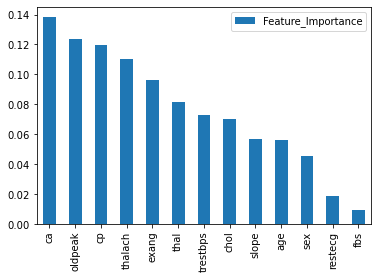

In [18]:
feature_importances.plot(kind='bar')

In [19]:
# Save the model
pickle.dump(model, open('rf_heart_disease.pkl', 'wb'))

In [20]:
# Prediction (Load the model)
model = pickle.load(open('rf_heart_disease.pkl', 'rb'))

In [21]:
# Extract a record for prediction
X_validation.iloc[0]

age          57.0
sex           1.0
cp            0.0
trestbps    150.0
chol        276.0
fbs           0.0
restecg       0.0
thalach     112.0
exang         1.0
oldpeak       0.6
slope         1.0
ca            1.0
thal          1.0
Name: 179, dtype: float64